In [6]:
import numpy as np


class InputSet:
    def __init__(self, height, width, ):
        self.event_bitrate = None
        self.adder_features = np.zeros((height, width), dtype=bool)
        self.adder_time = None
        self.cv_features = np.zeros((height, width), dtype=bool)
        self.cv_time = None

    def total_adder(self):
        return np.sum(self.adder_features.astype(int))

    def total_cv(self):
        return np.sum(self.cv_features.astype(int))

In [7]:
def process_entry(entry, input_sets):
    if 's' in entry:
        if "OpenCV" in entry['s']:
            input_sets[-1].cv_features[entry['y'], entry['x']] = True
        elif "ADDER" in entry['s']:
            input_sets[-1].adder_features[entry['y'], entry['x']] = True
        else:
            raise Exception("Malformed entry")
    elif 'psnr' in entry:
        print(entry)


In [8]:
import pickle

objects = []
with (open("/home/andrew/Code/adder-codec-rs/features_19_10_2023_14_39_22.log", "rb")) as openfile:
    # Read the dimensions
    dims = openfile.readline().decode('UTF-8')
    print(dims)
    width = int(dims.split('x')[0])
    height = int(dims.split('x')[1])
    #
    dbg_lines = 0
    #
    input_interval_idx = 0
    #
    input_sets = [InputSet(height, width)]

    while True:
        try:
            entry = pickle.load(openfile)
            if type(entry) == str and "ADDER FAST:" in entry:
                # The start of a new interval
                time = entry.split(': ')[1]
                input_sets[-1].adder_time = int(time)
                continue
            elif type(entry) == str and "bps:" in entry:
                # The bitrate
                # The end of the interval
                bitrate = entry.split(': ')[1]
                input_sets[-1].event_bitrate = bitrate

                input_sets += [InputSet(height, width)]
                input_interval_idx += 1
                continue
            elif type(entry) == str and "OpenCV FAST:" in entry:
                time = entry.split(': ')[1]
                input_sets[-1].cv_time = int(time)

            else:
                process_entry(entry, input_sets)

                # print(entry)
                dbg_lines += 1
                # if dbg_lines == 100000:
                #     break
        except EOFError:
            break



960x540x3

{'psnr': 62.22523001806752, 'mse': 0.038954475308641975, 'ssim': 99.84469498021646}
{'psnr': 48.575817893151005, 'mse': 0.9026067386831276, 'ssim': 98.00960324371597}
{'psnr': 42.9971827562053, 'mse': 3.261084747942387, 'ssim': 96.12288200957767}
{'psnr': 42.19776199760783, 'mse': 3.9201633230452675, 'ssim': 95.35095298443863}
{'psnr': 41.25460637532432, 'mse': 4.871017875514403, 'ssim': 94.1991951896015}
{'psnr': 41.20050181446425, 'mse': 4.932080761316873, 'ssim': 93.7387655990598}
{'psnr': 40.46615156948023, 'mse': 5.840704089506173, 'ssim': 93.59642394087265}
{'psnr': 40.78011801149057, 'mse': 5.433360982510288, 'ssim': 93.2601703690763}
{'psnr': 40.227297108009516, 'mse': 6.170930426954732, 'ssim': 92.95852182946557}
{'psnr': 40.532952456942866, 'mse': 5.7515528549382715, 'ssim': 92.3303508283626}
{'psnr': 40.08428229674055, 'mse': 6.377524434156379, 'ssim': 92.3055600040794}
{'psnr': 40.17713310432873, 'mse': 6.242622170781893, 'ssim': 91.99835714028151}
{'psnr': 38.85

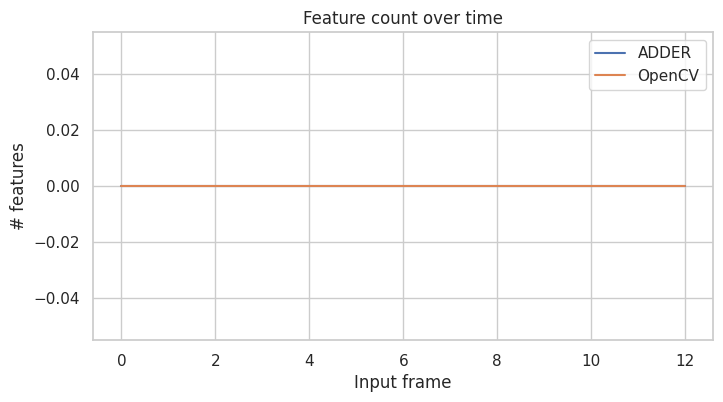

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3

adder_feature_count = [obj.total_adder() for obj in input_sets]
cv_feature_count = [obj.total_cv() for obj in input_sets]

sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

sns.lineplot(x=range(len(input_sets) - 1), y=adder_feature_count[:-1], marker=None, label="ADDER")
sns.lineplot(x=range(len(input_sets) - 1), y=cv_feature_count[:-1], marker=None, label="OpenCV")
plt.ylabel("# features")
plt.xlabel("Input frame")
plt.title("Feature count over time")

plt.show()
# interactive_plot = mpld3.display()
# interactive_plot

In [10]:
adder_times = [obj.adder_time for obj in input_sets]
cv_times = [obj.cv_time for obj in input_sets]

sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

sns.lineplot(x=range(len(input_sets)), y=adder_times, marker=None, label="ADDER")
sns.lineplot(x=range(len(input_sets)), y=cv_times, marker=None, label="OpenCV")
plt.ylabel("Time (ns)")
plt.xlabel("Input frame")
plt.yscale('log')
plt.title("Feature detection speed")

plt.show()
# interactive_plot = mpld3.display()
# interactive_plot


cv_mean = np.mean(np.array(cv_times[:-1]))
adder_mean = np.mean(np.array(adder_times[:-1]))
percent_change = (adder_mean / cv_mean) - 1
print('OpenCV mean:', cv_mean, '  Median:', np.median(np.array(cv_times[:-1])))
print('ADDER mean:', adder_mean, "({:.1f}%)".format(percent_change * 100), '  Median:',
      np.median(np.array(adder_times[:-1])))


ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 800x400 with 1 Axes>

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'